In [2]:
import numpy as np
import pandas as pd
import random as rnd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from scipy.stats import *
from sklearn import preprocessing 
import matplotlib.pyplot as plt 
%matplotlib inline 
import random as rnd

In [3]:
df=pd.read_csv('regLinPoli2.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,y
0,153.782162,23648.953370,2.186906,0.155247,16,-153.782162,-23648.95337,-2.186906,-0.155247,-909.534012,...,272,-1856,1390,-4293,4171,-3493,-290,-1017,9,2.033960e+15
1,645.991251,417304.697100,2.810227,-0.923396,35,-153.782162,-23648.95337,-2.810227,0.923396,343.752475,...,-265,-3587,-2479,-1284,-2127,2369,2657,-1481,-150,4.694470e+19
2,-412.060457,169793.820200,2.614961,0.489764,-25,-153.782162,-23648.95337,-2.614961,-0.489764,-776.331121,...,9,4104,-4634,-1637,-4228,527,-1773,-1676,67,-2.017100e+18
3,35.884351,1287.686648,1.554905,-0.970388,-75,-153.782162,-23648.95337,-1.554905,0.970388,696.736200,...,-215,749,-3645,-3202,-1173,-3248,1888,1295,-49,7.629161e+10
4,-85.073496,7237.499779,1.929794,0.247883,44,-153.782162,-23648.95337,-1.929794,-0.247883,-527.805076,...,-360,2150,507,-1972,-7497,-2427,4368,670,43,-3.225260e+13


In [4]:
X=np.array(df.iloc[:,0:38]) 
y=np.array(df.iloc[:,38])

In [5]:
len(df)

1029

In [6]:
selec=[]
n=(np.floor(np.round(len(X)/10.0))).astype(int)
w=list(df.index.values)
for i in range(10):
    if len(w)>=n:
        samp=list((rnd.sample(w,n)))
        selec=selec+[samp]
        w=[x for x in w if x not in samp]
    else:
        samp=list((rnd.sample(w,len(w))))
        selec=selec+[samp]
   

In [7]:
len(selec[8])

103

In [8]:
def crossval(X,a,sel):
    train=[x for x in a if x not in sel]
    valid=[x for x in a if x in sel]
    return train,valid

In [12]:
def salida(w0,w,X):
    suma = w0
    for i in range(len(w)):
        suma = suma + w[i]*X[i]
    return suma

In [13]:
def regularizado(w,x,y,lam,eta):

    for i in range(len(x)):

        sal = salida(w[0],w[1:len(w)],x[i])
        #Calculo el error de prediccion        
        error =y[i] - sal
        # Obtengo el error w0
        w[0] = w[0] + eta*error
        
    
        for j in range(len(x.T)):
            w[j+1] = w[j+1] + eta*error*X_train[i,j] - lam*w[j+1]
        
    return w

In [22]:
len(np.arange(0.0,.5,0.01))

50

In [45]:
#lmb=np.array([])
errprom=np.array([]) 
lamb=np.arange(0.0,.01,0.001)
for i in lamb:
    errmin=[]
    for j in range(len(selec)):
        train,test=crossval(X,list(df.index.values),selec[j])
        X_train=X[train]
        y_train=y[train]
        X_test=X[test]
        y_test=y[test]
        
        scalerx = preprocessing.StandardScaler().fit(X_train)
        X_train=scalerx.transform(X_train)
        X_test=scalerx.transform(X_test)
        
        m=np.mean(y_train)
        sd=np.std(y_train)
        y_train=(y_train-m)/sd
        y_test=(y_test-m)/sd
        
        w=[rnd.random() for i in range(X_train.shape[1]+1)]
        
        w=regularizado(w,X_train,y_train,i,0.01)
        errt=np.mean((y_train - (w[0]+ np.dot(X_train,w[1:len(w)])))**2)
        errmin=errmin+[errt]
    errprom=np.append(errprom,np.mean(np.array(errmin)))    
    

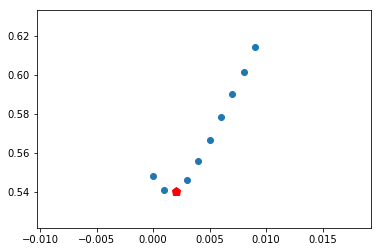

In [47]:
plt.scatter(lamb,errprom)
plt.plot(lamb[np.where(abs(np.array(errprom))==min(abs(np.array(errprom))))],min(abs(np.array(errprom))),'p-',color='red',ms=9)

In [48]:
np.min(errprom)
lamb[np.where(abs(np.array(errprom))==min(abs(np.array(errprom))))]

array([ 0.002])

In [159]:
lmb=np.array([])
errmin=np.array([])
for j in range(len(selec)):
    
    train,test=crossval(X,list(df.index.values),selec[j])
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
    
    scalerx = preprocessing.StandardScaler().fit(X_train)
    X_train=scalerx.transform(X_train)
    X_test=scalerx.transform(X_test)

    m=np.mean(y_train)
    sd=np.std(y_train)
    y_train=(y_train-m)/sd
    y_test=(y_test-m)/sd
    
    w=[rnd.random() for i in range(X_train.shape[1]+1)]
    lamb=np.arange(0.0,.03,0.001)
    err=[]
    for i in lamb:
        w=regularizado(w,X_train,y_train,i,0.01)
        #err=np.append(err,error)
    #print(lamb[np.where(abs(err)==min(abs(err)))][0])
        errt=np.mean((y_train - (w[0]+ np.dot(X_train,w[1:len(w)])))**2)
        err=err+[errt]
    #print(err)    
    lmb=np.append(lmb,lamb[np.where(abs(np.array(err))==min(abs(np.array(err))))]) 
    errmin=np.append(errmin,err[np.where(abs(np.array(err))==min(abs(np.array(err))))[0][0]])

In [160]:
errmin

array([ 0.54682896,  0.54241378,  0.51453592,  0.58083801,  0.51635842,
        0.53705562,  0.53775043,  0.53078444,  0.55705959,  0.5341516 ])

In [161]:
lmb

array([ 0.002,  0.002,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
        0.002,  0.001])

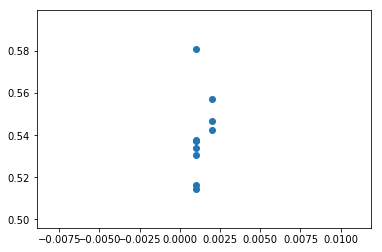

In [162]:
plt.scatter(lmb,errmin)

In [169]:
def cross_reg(a,k):
    
    selec=[]
    n=(np.floor(np.round(len(X)/k))).astype(int)
    w=list(a.index.values)
    for i in range(k):
        if len(w)>=n:
            samp=list((rnd.sample(w,n)))
            selec=selec+[samp]
            w=[x for x in w if x not in samp]
        else:
            samp=list((rnd.sample(w,len(w))))
            selec=selec+[samp]
    
    lmb=np.array([])
    errmin=np.array([])
    for j in range(len(selec)):
        
        train,test=crossval(X,list(a.index.values),selec[j])
        X_train=X[train]
        y_train=y[train]
        X_test=X[test]
        y_test=y[test]
    
        scalerx = preprocessing.StandardScaler().fit(X_train)
        X_train=scalerx.transform(X_train)
        X_test=scalerx.transform(X_test)

        m=np.mean(y_train)
        sd=np.std(y_train)
        y_train=(y_train-m)/sd
        y_test=(y_test-m)/sd
    
        w=[rnd.random() for i in range(X_train.shape[1]+1)]
        lamb=np.arange(0.0,.03,0.001)
        err=[]
        for i in lamb:
            w=regularizado(w,X_train,y_train,i,0.01)
            #err=np.append(err,error)
        #print(lamb[np.where(abs(err)==min(abs(err)))][0])
            errt=np.mean((y_train - (w[0]+ np.dot(X_train,w[1:len(w)])))**2)
            err=err+[errt]
            #print(err)    
        lmb=np.append(lmb,lamb[np.where(abs(np.array(err))==min(abs(np.array(err))))]) 
        errmin=np.append(errmin,err[np.where(abs(np.array(err))==min(abs(np.array(err))))[0][0]])
    return(lmb,errmin)

In [170]:
la,ermin=cross_reg(df,10)

In [171]:
la

array([ 0.029,  0.029,  0.011,  0.029,  0.008,  0.029,  0.029,  0.029,
        0.029,  0.029])

In [172]:
ermin

array([ 0.87686375,  0.97867491,  0.99029776,  1.01473212,  1.1287919 ,
        0.891613  ,  1.08978854,  1.0030869 ,  1.05819921,  0.91692035])

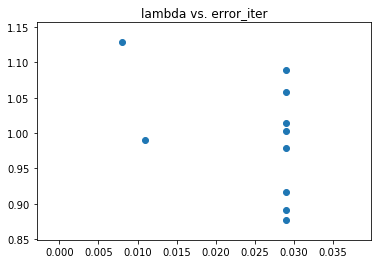

In [173]:
plt.scatter(la,ermin)
plt.title('lambda vs. error_iter')

In [154]:
np.mean(la)

0.023700000000000002

In [327]:
np.arange(-.0001,.0003,0.0001)

array([-0.0001,  0.    ,  0.0001,  0.0002])